In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import torch.nn as nn
import torch
import math
import matplotlib.pylab as plt
import cv2
import csv
import torchvision
import torch.nn.functional as F
import sys
from torchvision import datasets, transforms

In [2]:
def stair_funciton(x):
    if x > 0 :
        return 1
    else:
        return 0

In [3]:
a = np.random.rand(2,3)

a

array([[0.62012994, 0.72037681, 0.23707213],
       [0.35922898, 0.23271611, 0.9951836 ]])

In [4]:
if ValueError:
    print("계단함수는 배열을 입력으로 받을 수 없다.")
else:
    stair_funciton(a)

계단함수는 배열을 입력으로 받을 수 없다.


In [5]:
def new_stair_func(x):
    y = (x > 0) # x가 0보다 크면 True(1)를 출력하는 부등호 연산
    return y.astype(np.int32)

In [6]:
new_stair_func(a)

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

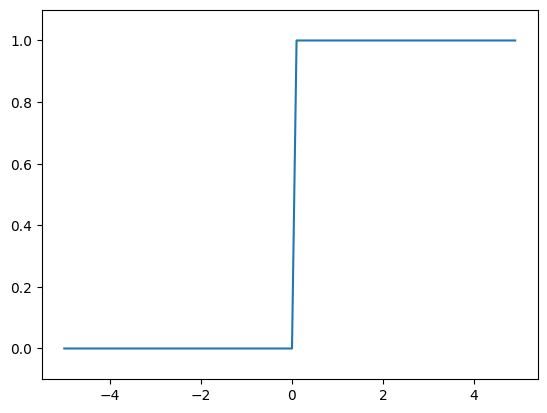

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = new_stair_func(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
# 시그모이드 구현

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [9]:
x = np.random.randn(2,3)
sigmoid(x)

array([[0.31018407, 0.35170315, 0.64381605],
       [0.57526243, 0.12628256, 0.21226385]])

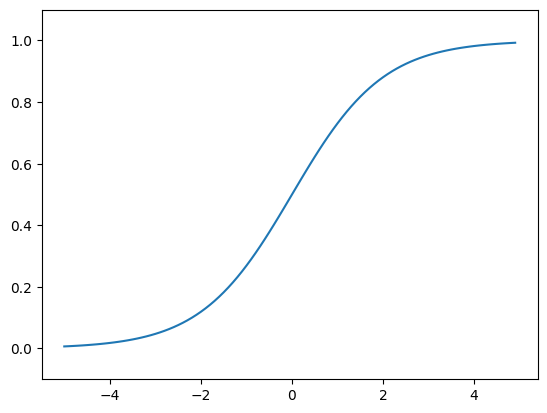

In [10]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
# relu 구현

def relu(x):
    return np.maximum(0, x)

In [12]:
# 2 -> 3 -> 4 -> 2

X = np.random.normal(-5.0, 5.0, 2) # 랜덤 실수 입력
W = np.random.rand(2,3) # 랜덤 가중치
b = np.random.normal(-1,1,1) # 랜덤 편향

print(X)

[-13.40424238   3.99005094]


In [13]:
X2 = sigmoid(np.dot(X,W) + b)
W2 = np.random.rand(3,4)
b2 = np.random.normal(-1,1,1)

print(X2)

[3.67300521e-02 5.65725068e-05 5.07708258e-01]


In [14]:
X3 = sigmoid(np.dot(X2, W2) + b2)
W3 = np.random.rand(4,2)
b3 = np.random.normal(-1,1,1)

print(X3)

[0.3244361  0.3243838  0.34803824 0.33953228]


In [15]:
X_out = sigmoid(np.dot(X3, W3) + b3)

print(X_out)

[0.57500501 0.59750866]


In [16]:
# softmax 구현

def softmax_no_minus(x):
    if type(x) != np.ndarray:
        x = np.array(x)
        
    return np.exp(x) / np.sum(np.exp(x))

In [17]:
test = np.array([1.0, 2.0, 800])

print(np.sum(np.exp(test)))

# 오버플로우 발생.. 식을 해치지 않으면서 오버플로우를 피할 수 있을까?

inf


C:\Users\zkdls\AppData\Local\Temp\ipykernel_11752\1881730108.py:3: RuntimeWarning: overflow encountered in exp
  print(np.sum(np.exp(test)))


In [18]:
test2 = np.array([1.0, 2.0, 4.7])

def softmax(x):
    if type(x)!=np.ndarray:
        x = np.array(x)
    
    M = np.max(x) # 배열의 최댓값
    
    return np.exp(x-M) / np.sum(np.exp(x-M))

# 분모 분자에 배열의 최댓값을 대입한 지수함수를 나누어 줌으로써 오버플로우를 피할 수 있다.

result = softmax(test2)

str_list = [f'{val *100: .3f}%' for val in result.tolist()] 

# 파이썬 컴프리헨션 : 
# [표현식 for 변수 in 순회 가능 객체]
# [표현식 for 변수 in 순회 가능 객체 if 조건]
# {키 : 값 for 변수 in 순회 가능 객체 if 조건}
# --> 반복문을 한 줄로 쓰고 싶을 때 사용.

print(str_list, f'소프트맥스의 합은 항상 : {np.sum(result)}') 
# 소프르맥스는 확률로 보고 사용할 수 있다. 따라서 분류등의 출력층에서 자주 사용된다.

[' 2.264%', ' 6.155%', ' 91.581%'] 소프트맥스의 합은 항상 : 1.0


In [19]:
test_arr = np.array([1,2,3])

test_list = test_arr.tolist()
test_list2 = list(test_arr)

print(test_list, test_list2)

# --> ndarray의 형변환은 생성자를 통한 변환이 아니라 tolist(), todict()와 같은 numpy 특화 메서드를 사용한다.

[1, 2, 3] [np.int64(1), np.int64(2), np.int64(3)]


간단한 신경망을 이용한 mnist cls

In [20]:
data_path = './mnist'
transform = transforms.Compose([
    transforms.ToTensor()
])

train_set = datasets.MNIST(root=data_path, train=True, download=True, transform=transform)
test_set = datasets.MNIST(root=data_path, train=False, download=True, transform=transform)

100.0%
100.0%
100.0%
100.0%


In [21]:
img, label = train_set[59999]

print(img.shape[1:], len(train_set))

# 28 * 28 * 1 size의 입력 데이터 6만장으로 이루어졌고 img, label 형태의 튜플로 담겨져있음을 알 수 있음.

torch.Size([28, 28]) 60000


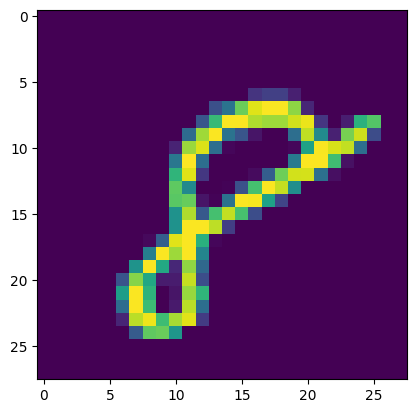

In [22]:
plt.imshow(img.permute(1,2,0)) # channel이 가장 마지막으로 가도록 전치. 해당 메서드가 받아들이는 순서대로 입력해줘야함.


# 학습 신경망을 만들기 전에 주의점

1. 입력층 뉴런의 개수는 28*28 = 784
2. 출력층 뉴런의 개수는 10개 (0~9까지 10개)
3. hidden_layer의 개수는 2개, 첫 번째 은닉층은 뉴런 50개, 두 번째 은닉층은 뉴런 100개. --> 임의로 정한 하이퍼파라미터

# 흐름

1. 이미지 한 장 가져와서 #데이터로더나 미니배치 등은 다음에...
2. 신경망에 넣고
3. 예측

# 신경망을 만들 때 __init__에는 무엇을 넣고, forward에는 무엇을 넣어야 하나? 두 함수의 역할은 뭘까?

1. __init__은 모델의 구조를 설계하고, 부품을 준비하는 단계라고 생각하면 쉽습니다.
    이 모델이 어떤 구조를 가질 것인가? 어떤 부품으로 그 구조를 구성할 것인가?

2. forward 함수는 작동 방식 설명서라고 생각하자. __init__에서 준비한 부품을 어떤 순서로 어떻게 거쳐서 조립할 것인지..
    
# 그런데 왜 self로 선언하나요? 그냥 선언하면 안되나요?

파이썬은 객체 지향 프로그래밍 언어이기 때문이다. 
class 안에서 self로 변수를 선언한다는 것은 class의 멤버 변수로서 변수를 선언하겠다는 약속이다.
선언된 변수는 class에 종속되는 변수로서 사용되고 이를 통해 객체지향프로그래밍을 구현할 수 있다.

# 왜 MNIST 신경망 scratch 코드짜다가 삼천포로 빠지나요?

그만큼 간단한 신경망도 만들기 전에 모르는게 많았나 봅니다. 맨날 라이브러리만 쓰고 만들어져있는것만 써서 그래요...

# def __init__(self, x, y): 로 선언했다면 __init__ 함수에 self.x랑 self.y는 무조건 선언해야하나요?

__init__ 함수에는 엄밀히 말하면 '객체의 속성'으로 저장할 필요가 있는 변수들을 저장하는 것이다.
x랑 y의 값을 계속 참조하거나 사용해야 한다면? 선언해야합니다.
그런데 예를 들어서 x랑 y를 입력으로 받고나서 self.result = x + y 로 선언한다면?
result만 선언하고 x랑 y는 한번 만 사용되는것입니다. 즉 '무조건해야만한다'는 아닙니다. 하지만 대부분은 선언되겠죠.


In [23]:
# __init__에 입력으로 받을 변수들을 적을 때 특정 값까지 선언해버리는 경우는 무엇일까?
# 그것은 바로 해당 모델의 default값을 설정하는것이다. 모델을 객체화할때 다르게 선언하지 않는 경우에는 해당 값을 사용하겠다는 의미다.

class MNN(nn.Module):
    def __init__(self, input_size=784, hidden_size=[50,100], num_classes=10, batch_size = 100):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.batch_size = batch_size
        
        self.w1 = torch.nn.Parameter(torch.randn(input_size, hidden_size[0]))
        self.b1 = torch.nn.Parameter(torch.randn(hidden_size[0],)*0.1)
        
        self.w2 = torch.nn.Parameter(torch.randn(hidden_size[0], hidden_size[1]))
        self.b2 = torch.nn.Parameter(torch.randn(hidden_size[1],)*0.1)
        
        self.w3 = torch.nn.Parameter(torch.randn(hidden_size[1], num_classes))
        self.b3 = torch.nn.Parameter(torch.randn(num_classes,)*0.1)
        
        #위에서 구현한 함수들로 사용
        
        self.relu = relu()
        self.softmax = softmax()
        
    def forward(self, x):
        """
        img = x[0] # img, label = x --> label은 forward에서는 딱히 필요가 없는 듯하여 수정. x = train_set[N]
        img_tensor = img.reshape(img.shape[1]*img.shape[2],) # 1*28*28 텐서를 입력데이터형태 1*784로 변형
        """
        
        h1 = relu(torch.matmul(x, self.w1) + self.b1)
        h2 = relu(torch.matmul(h1, self.w2) + self.b2)
        out_layer = softmax(torch.matmul(h2, self.w3) + self.b3)
        predicted_label = int(torch.argmax(out_layer))  # 가장 높은 확률을 갖는 인덱스가 무엇이냐. 인덱스는 예측과 동일함.
        
        return predicted_label
    
    

# 의문

내가 출력층을 N * 10으로 클래스개수에 맞춰서 10개로 구성했어. 그런데 이 10개가 인덱스 순서대로 0~9의 MNIST 숫자이미지에 해당한다고
보장할 수 있나?

# 해결

손실함수를 학습시키고 모델을 최적화하는 과정에서 각각의 인덱스가 0~9를 의미하도록 유도해줘야하는 것이다.
사용자가 의미를 부여해줘야하는것이 맞다. 이런 입력에는 이런 출력이 가장 확률이 높도록 만들도록 가중치 행렬을 업데이트 해나가는것이다.


In [ ]:
# 손실함수

# 1. 오차제곱합 : SUM OF SQUARES FOR ERROR (SSE)
    # 가장 많이 쓰이는 손실함수
    
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)^2)

# 2. 교차 엔트로피 오차 : CROSS ENTROPY ERROR (CEE)

def cross_entrophy(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))


def cross_entrophy_batch(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size



##### 크로스엔트로피는 기본적으로 두 확률 분포 사이의 차이(=거리)를 측정하는 방법이다.
실제정답 = T , 모델이 예측한 정답 = Y 라고 해보자.
MNIST를 예를 들어 label = 3이라고 치면 정답 레이블은 [0,0,0,1....] 이런식의 원핫인코딩된 레이블이다.
3일 확률 100퍼센트, 아닐 확률 0퍼센트의 확률 분포 레이블인 셈.

실제정답레이블이 곱해짐으로써 0퍼센트의 확률 분포는 전부 0이 된다. 즉 정답레이블이 얼마나 가깝게 예측되었는지에 따라 오차가 크고 작아진다. 예측과 실제가 비슷할수록 오차값이 작아집니다.

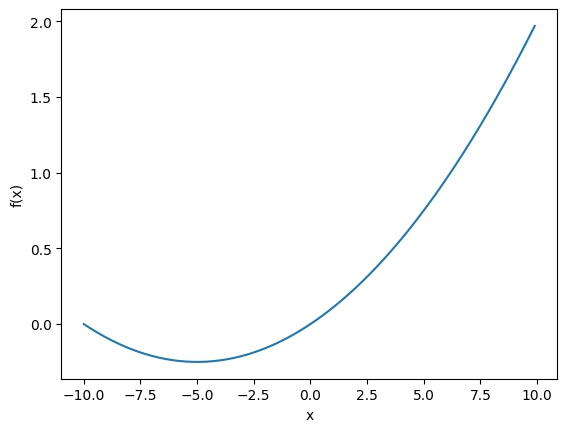

In [25]:
# 수치 미분 : 해석학적 미분이 아닌 근사치를 구하는 미분
# 경사하강법으로 가중치행렬 학습시킬 때 미분 사용해야함!

def numerical_diff(func, x):
    h = 1e-4
    return (func(x+h)-func(x-h)) / (2*h)

# 수치미분 테스트

def func1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(-10.0, 10.0, 0.1)
y = func1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()    

In [26]:
print(numerical_diff(func1, 5))

0.1999999999990898


In [27]:
# 편미분

def func2(x):
    return x[0]**2 + x[1]**2 # np.sum(x^^2)

# 위 함수에 대한 편미분

# x[1] = 3 인 경우
def func2_x0(x):
    return x**2 + 9

result = numerical_diff(func2_x0, 4)
print(result)

7.999999999999119


In [ ]:
# 기울기
# 위에서는 편미분 구할 때 하나고정시키고 하나 구하고 이런식으로 구했는데 동시에는 못 구할까?

def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x랑 같은 형태의 제로행렬 선언
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad


# 테스트
print(numerical_gradient(func2, np.array([3.0, 4.0])))


[6. 8.]


In [29]:
# 경사 하강법.. 말 그대로 미분을 통해 함수의 전역적 최솟값의 근사치를 구하는 것이 목적이다.
# x = x - l*(df/dx)

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num): #step_num 만큼 학습률을 차감한다
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x


In [ ]:
# 신경망에서의 기울기
cross_entrophy


[[0. 0. 0.]
 [0. 0. 0.]]


6

In [31]:
# 이제 배치단위로 학습하도록 신경망을 바꿔주고 역전파를 넣어주면 된다....

# 먼저 train_set의 label을 정답인덱스만 1로 바꿔주는 원핫인코딩을 해준다. 아니, 이 과정은 배치 단위로 사용할 때 실시간으로 해준다.

# 그럼 무엇을 해야하나.. batch_size = 100 으로 설정하고 100개를 임의로 뽑는다.

n = 0
epoch = 50
batch_size = 100

while n < 50:
    batch_mask = np.random.choice(len(train_set), batch_size) #60000개의 훈련이미지에서 batch_size만큼에 해당하는 인덱스 랜덤추출

    for i in range(batch_size):
        idx = batch_mask[i]
    
        img, label = train_set[idx]
        
        
        

    n += 1
    
    



In [32]:
batch_mask

array([ 9964, 41505,  9524, 26034,   376, 43616, 51814, 45252,   591,
       37881, 44510, 22500, 43993, 42539, 32820, 48360, 43113, 21125,
       41604, 27794, 10520, 27380, 12220, 58182, 17277, 41099, 24337,
        1676,  3508,  4649, 35743, 58051,  7678, 45836,  7560, 36959,
       55549, 34469, 40506, 42525, 31714, 32081,  3593, 22293, 43054,
       14998, 59940, 38911, 23854, 59769, 13685,  8177, 43453,  9994,
       12602,  6844, 10044, 12926, 36818,  9834, 55539, 20846, 47473,
       16009, 35794, 10802, 39270, 11702, 10021, 45961,  3112, 36774,
       40188, 16789,  8643, 15372, 32001,  5978, 58786, 14950, 50433,
        8156, 29093, 56585, 37189, 20341, 23350, 32998, 33889, 29550,
       20008, 53982, 47105, 13777, 20887, 30978, 56791, 52606, 51083,
        1165], dtype=int32)